<img src="./data_viz_2_cover.png" width=1200 height=400/>

<p style="font-size:25px; color:#496595">Learning Matplotlib Basics</p>

In this notebook we will learn the basics of Matplotlib. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations. We will lear how to plot different types of data using the extensive graph library of Matplotlib. We will also learn how to customize the graphs to make them more presentable and easy to understand.

<p style="font-size:25px; color:#496595">Table of Contents</p>

1. **Parts of Figure**

2. **Line Charts**
   
3. **Bar Charts**

4. **Histogram**
   
5. **Scatter Plot**

6. **Box Plot**

7. **Pie Chart**

8. **Heatmap**

9. **Multiple Subplots**

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl

<p style="font-size:25px; color:#496595">1. Parts of a Figure</p>

[Image source: Matplotlib.Org](https://matplotlib.org/stable/_images/anatomy.png)

<img src="./anatomy.webp" width=500 height=500/>

<p style="font-size:25px; color:#496595">2. Line Charts</p>

Line charts are suitable for showing trends over time or ordered categories.

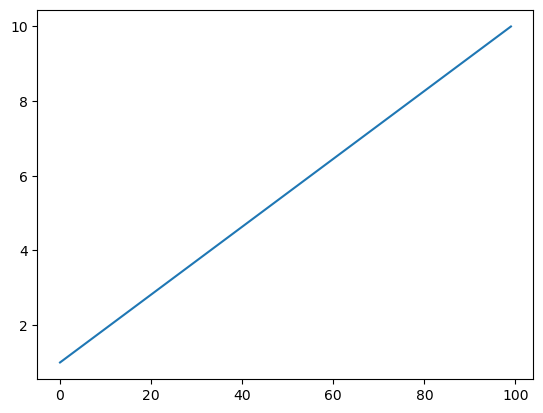

In [2]:
linear_data = np.linspace(1, 10, 100)
# print(linear_data)
# Simple line plot
plt.figure()
plt.plot(linear_data)
plt.show()

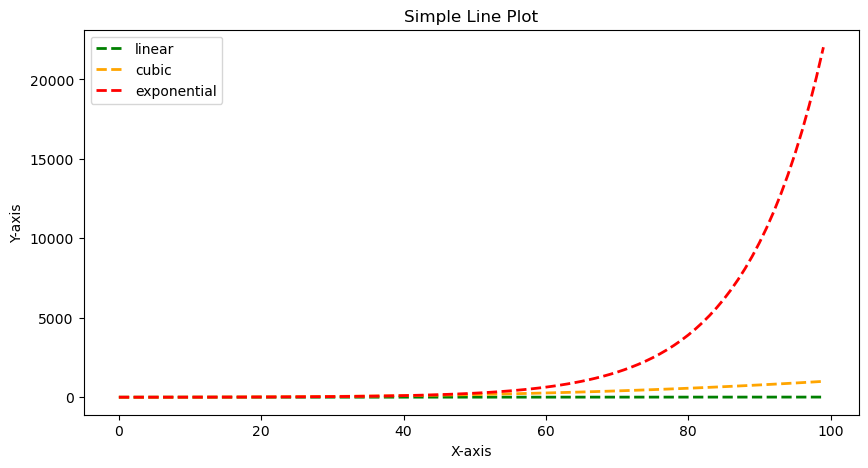

In [3]:
# Changing the size of the figure and adding some style to the plot
plt.figure(figsize=(10,5))
plt.plot(linear_data, '--', color='green', linewidth=2, label='linear')
plt.plot(linear_data ** 3, '--', color='orange', linewidth=2, label='cubic')
plt.plot(np.exp(linear_data), '--', color='red', linewidth=2, label='exponential')
plt.title('Simple Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper left')
plt.show()

Line graphs are very useful for visualizing data that changes continuously over time. Let's getsome time series data and plot it using a line chart.

In [4]:
df_ts = pd.read_csv('./time_series.csv', parse_dates=['Date'])
df_ts.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


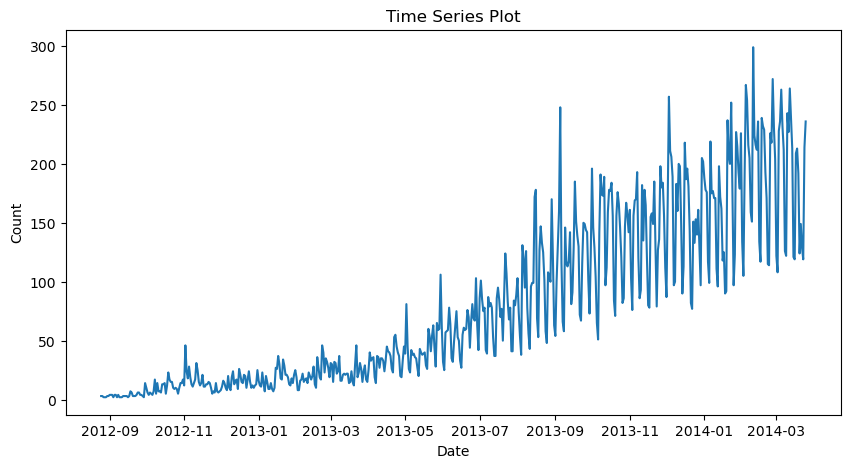

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_ts['Date'], df_ts['count'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

<p style="font-size:25px; color:#496595">3. Bar Charts</p>

Bar charts represent data using rectangular bars. They are effective for comparing categories or displaying discrete data.

In [6]:
df_bar = pd.DataFrame({'category': ['A', 'B', 'C', 'D'], 'value': np.random.rand(4)})
df_bar.head()

,category,value
0,A,0.469913
1,B,0.557233
2,C,0.504081
3,D,0.990541


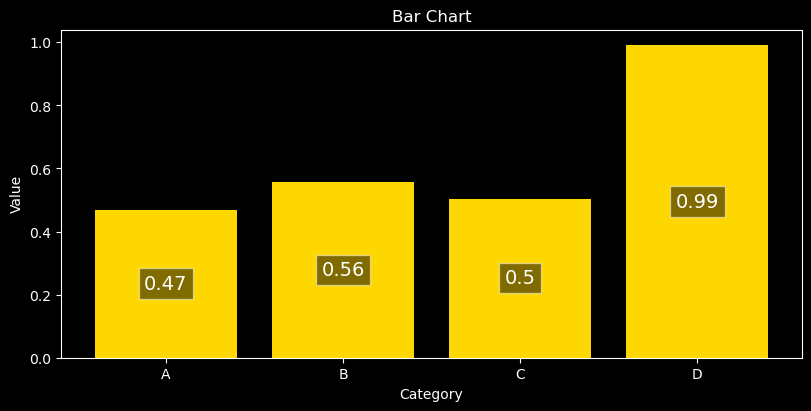

In [7]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, np.round(y[i], 2), ha='center', va='center', color='white', fontsize=14, bbox=dict(facecolor='black', alpha=0.5))

with plt.style.context('dark_background'):
    plt.figure(figsize=(8,4), facecolor='black', layout='constrained')
    plt.bar(data=df_bar, x='category', height='value', color='gold')
    plt.title('Bar Chart')
    plt.xlabel('Category')
    plt.ylabel('Value')
    add_labels(df_bar['category'], df_bar['value'])
plt.show()

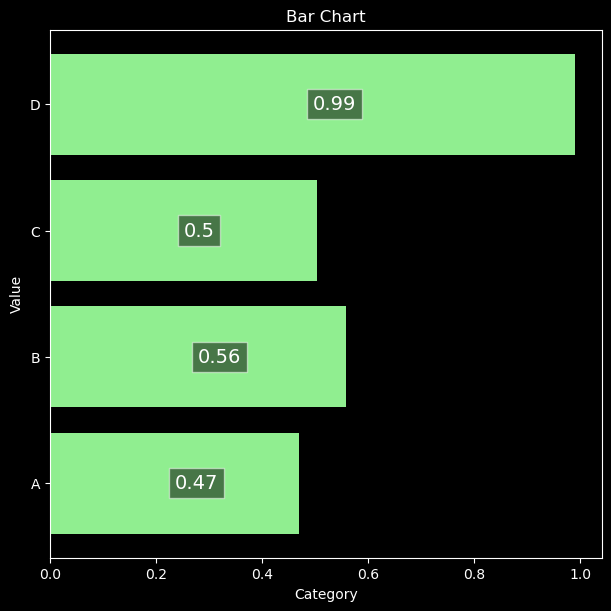

In [8]:
def add_labels(x,y):
    for i in range(len(df_bar.value)-1, -1, -1):
        # print(y[i]/2, i)
        plt.text(y[i]/2, i, np.round(y[i], 2), va='center', color='white', fontsize=14, bbox=dict(facecolor='black', alpha=0.5))

with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6), facecolor='black', layout='constrained')
    plt.barh(data=df_bar, y='category', width='value', color='lightgreen')
    plt.title('Bar Chart')
    plt.xlabel('Category')
    plt.ylabel('Value')
    add_labels(df_bar['category'], df_bar['value'])
plt.show()

* Stacked bar chart

In [9]:
# add values to the df_bar dataframe
df_bar = pd.DataFrame()
df_bar['category'] = ['A', 'A', 'B', 'B', 'C', 'D']
df_bar['value'] = np.random.rand(len(df_bar['category']))
df_bar['gender'] = ['M', 'F', 'M', 'F', 'F', 'M']
df_bar.head()


,category,value,gender
0,A,0.025636,M
1,A,0.618770,F
2,B,0.922429,M
3,B,0.470200,F
4,C,0.797682,F


In [10]:
pivot_df = df_bar.pivot(index='category', columns='gender', values='value').fillna(0)
pivot_df

gender,F,M
category,,
A,0.618770,0.025636
B,0.470200,0.922429
C,0.797682,0.000000
D,0.000000,0.142978


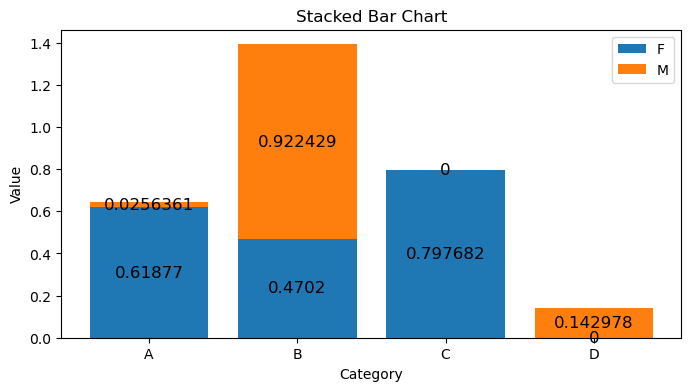

In [11]:
# Figure and Axes
fig, ax = plt.subplots(figsize=(8,4))
bottom = np.zeros(len(df_bar['category'].unique()))
# print(bottom)
for gender, value in {f"{i}" : pivot_df[i] for i in pivot_df.columns}.items():
    p = ax.bar(df_bar.category.unique(), value, label=gender, bottom=bottom)
    bottom += value

    ax.bar_label(p, label_type='center', fontsize=12)
ax.set_title('Stacked Bar Chart')
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.legend()
plt.show()

<p style="font-size:25px; color:#496595">4. Histogram</p>

Histograms show the distribution of data by dividing it into bins and counting the number of data points in each bin.

In [12]:
df_hist = pd.DataFrame({'value': np.random.randn(1000)})
df_hist.head()

,value
0,-0.248516
1,0.189415
2,-0.732647
3,0.196932
4,0.346290


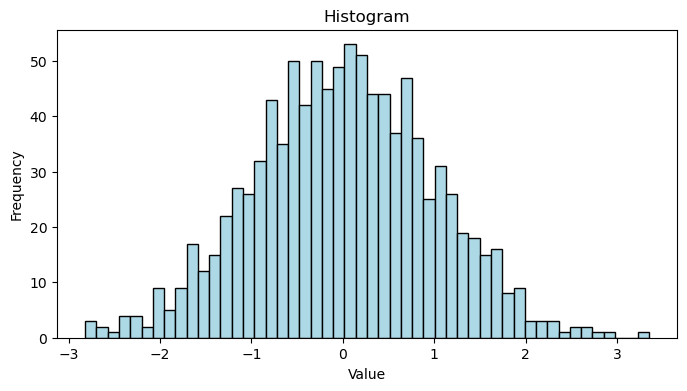

In [14]:
fix, ax = plt.subplots(figsize=(8,4))
ax.hist(df_hist['value'], bins=50, color='lightblue', edgecolor='black',)
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.show()

<p style="font-size:25px; color:#496595">5. Scatter Plot</p>

Scatter plots display individual data points on a two-dimensional plane, making them ideal for exploring relationships between two variables.

In [15]:
# Loading sample iris dataset from sklearn library
df_scat = pd.DataFrame(data=datasets.load_iris().data, columns=datasets.load_iris().feature_names)
df_scat['target'] = datasets.load_iris().target
df_scat.target = df_scat.target.apply(lambda x: datasets.load_iris().target_names[x])
df_scat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


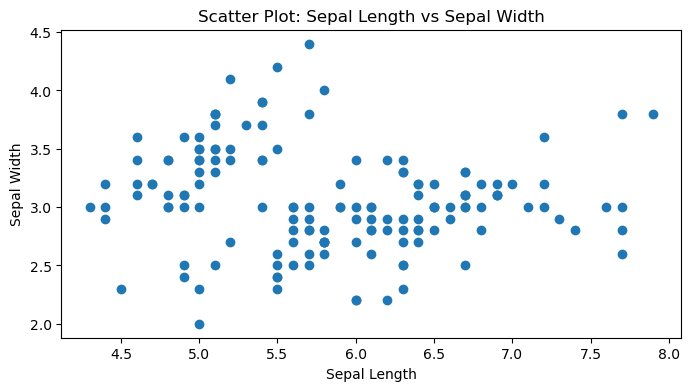

In [16]:
# Let's plot the scatter plot between sepal length and sepal width to see how they are related
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(df_scat['sepal length (cm)'], df_scat['sepal width (cm)'])
ax.set_title('Scatter Plot: Sepal Length vs Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
plt.show()

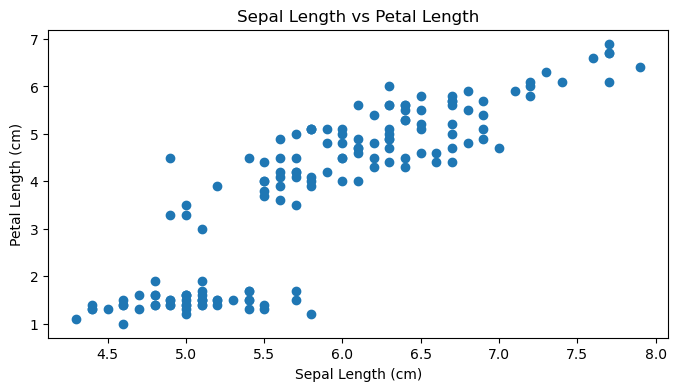

In [17]:
# Let's see Sapal Length vs Petal Length
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(df_scat['sepal length (cm)'], df_scat['petal length (cm)'])
ax.set_title("Sepal Length vs Petal Length")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
plt.show()

* Scatter plot with three dimensions, using color to represent the third dimension

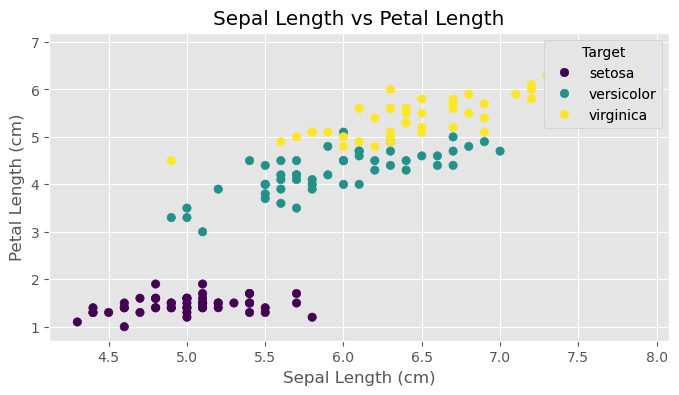

In [69]:
fig, ax = plt.subplots(figsize=(8,4))
colors = df_scat.target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
scatter = ax.scatter(data=df_scat, x='sepal length (cm)', y='petal length (cm)', c=colors, )
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Target")
legend_labels = ["setosa", "versicolor", "virginica"]
for text, label in zip(legend1.texts, legend_labels):
    text.set_text(label)
ax.add_artist(legend1)
ax.set_title("Sepal Length vs Petal Length")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
plt.show()

<p style="font-size:25px; color:#496595">6. Box Plots</p>

Box plots are used to visualize the distribution, spread, and outliers of numerical data.

* Let's use ggplot style for the rest of the plots

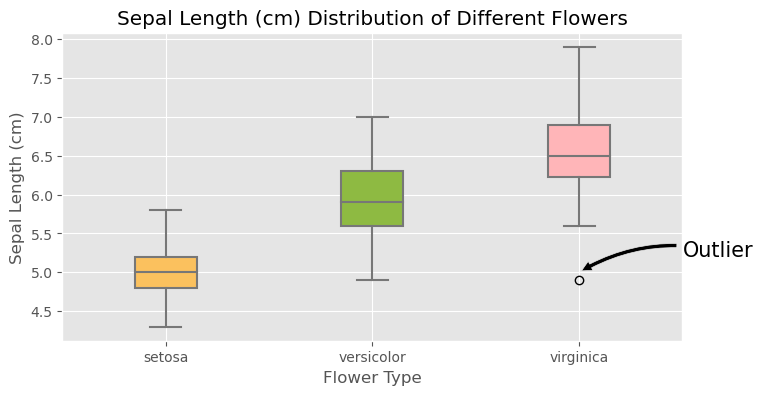

In [170]:
data_box = [df_scat[df_scat["target"] == t]["sepal length (cm)"].values for t in ["setosa", "versicolor", "virginica"]] 

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,4))
box = ax.boxplot(data_box, vert=True, patch_artist=True,
           medianprops={"color": "C3", "linewidth": 1.5},
           boxprops={"color": "C3", "linewidth": 1.5},
           whiskerprops={"color": "C3", "linewidth": 1.5},
           capprops={"color": "C3", "linewidth": 1.5})

colors = ['C4', 'C5', 'C6']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(df_scat.target.unique().tolist())
ax.set_title("Sepal Length (cm) Distribution of Different Flowers")
ax.set_ylabel("Sepal Length (cm)")
ax.set_xlabel("Flower Type")

# Adding annotation in the plots
ax.annotate("Outlier", xy=(3, 5),
            xytext=(3.5, 5.2),
            size=15, 
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2",
                            facecolor='black'))
plt.show()

<p style="font-size:25px; color:#496595">7. Pie Charts</p>

Pie charts represent data as a circular graph, with slices showing the proportion of each category.

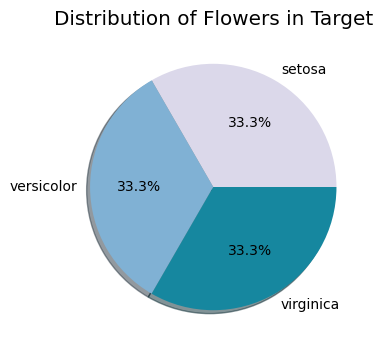

In [262]:
fig, ax = plt.subplots(figsize=(4,4))
colors = plt.get_cmap('PuBuGn')(np.linspace(0.2, 0.7, 3))

ax.pie(df_scat.target.value_counts(normalize=True), 
       labels=df_scat.target.unique().tolist(),
       colors=colors, radius=1,
       wedgeprops={"linewidth": 1,}, shadow=True,
       autopct="%1.1f%%")
ax.set_title("Distribution of Flowers in Target")
plt.show()

* We can also create a donut chart by changing the width of wedges

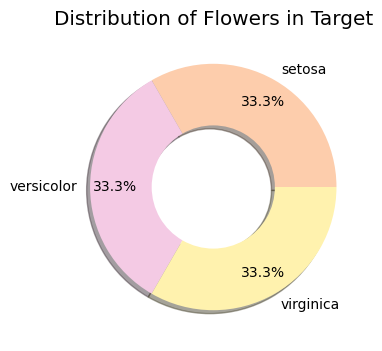

In [270]:
fig, ax = plt.subplots(figsize=(4,4))
colors = plt.get_cmap('Pastel2')(np.linspace(0.2, 0.7, 3))

ax.pie(df_scat.target.value_counts(normalize=True), 
       labels=df_scat.target.unique().tolist(),
       colors=colors, radius=1,
       wedgeprops={"linewidth": 1, "width":0.5}, shadow=True,
       autopct="%1.1f%%",
       pctdistance=0.8)
ax.set_title("Distribution of Flowers in Target")
plt.show()

<p style="font-size:25px; color:#496595">8. Heatmaps</p>

Heatmaps are used to represent data in a 2D matrix, with colors indicating values. They are great for displaying correlations or patterns.

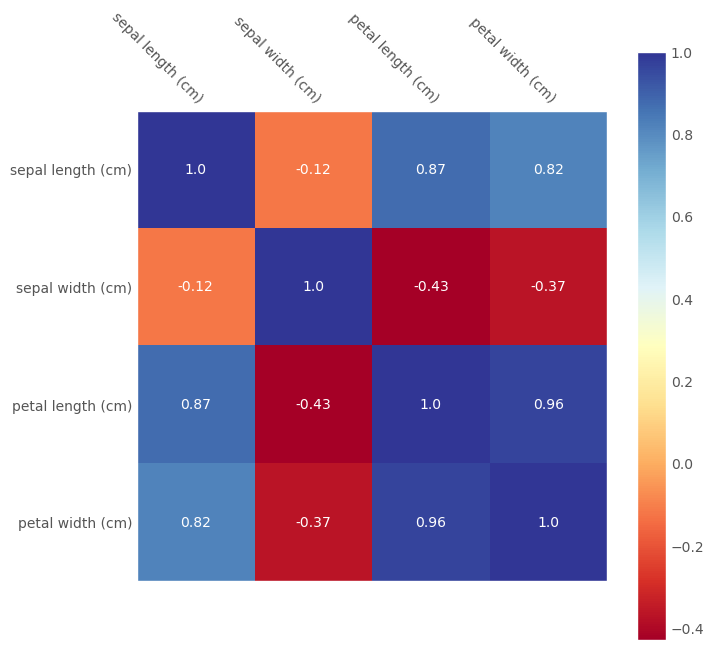

In [347]:
fig, ax = plt.subplots(figsize=(6,6))
df_corr = df_scat.corr()
im = ax.imshow(df_corr, cmap="RdYlBu", )
cbar = ax.figure.colorbar(im, ax=ax)

ax.grid(False)

ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
ax.set_xticks(range(df_corr.shape[1]))
ax.set_yticks(range(df_corr.shape[0]))
ax.set_yticklabels(df_corr.columns.tolist())
ax.set_xticklabels(df_corr.index,)

# Adding text labels to the heatmap
for i in range(df_corr.shape[0]):
    for j in range(df_corr.shape[1]):
        text = ax.text(j, i, np.round(df_corr.iloc[i, j], 2),
                       ha="center", va="center", color="w",)
        
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor")

plt.show()

<p style="font-size:25px; color:#496595">9. Multiple Subplots</p>

Multiple subplots allow you to display multiple charts in a single figure, making it easy to compare different data visualizations.

* We will use time serries data to plot charts for daily, weekly, monthly and yearly data

In [349]:
df_ts["day_of_month"] = pd.to_datetime(df_ts["Date"]).dt.day
df_ts["day_of_week"] = pd.to_datetime(df_ts["Date"]).dt.day_of_week
df_ts["month"] = pd.to_datetime(df_ts["Date"]).dt.month
df_ts["year"] = pd.to_datetime(df_ts['Date']).dt.year
df_ts.head()

,Date,count,day_of_month,day_of_week,month,year
0,2012-08-25,3,25,5,8,2012
1,2012-08-26,3,26,6,8,2012
2,2012-08-27,2,27,0,8,2012
3,2012-08-28,2,28,1,8,2012
4,2012-08-29,2,29,2,8,2012


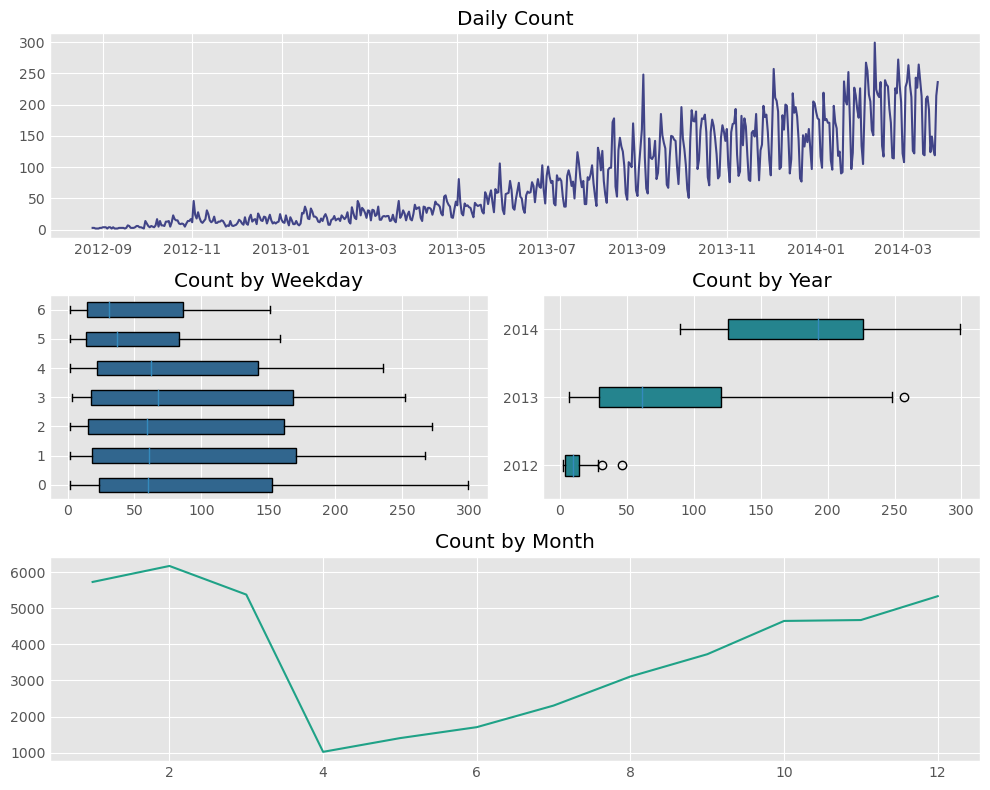

In [389]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(3, 2)
colors = plt.get_cmap('viridis')(np.linspace(0.2, 0.7, 5))

ax = fig.add_subplot(gs[0, :])
ax.plot(df_ts["Date"], df_ts["count"], color=colors[0])
ax.set_title("Daily Count")

ax = fig.add_subplot(gs[1,0])
box_w = ax.boxplot([df_ts[df_ts["day_of_week"] == dow]["count"] for dow in sorted(df_ts["day_of_week"].unique().tolist())],
           vert=False, patch_artist=True,)
for patch in box_w['boxes']:
    patch.set_facecolor(colors[1])
ax.set_yticklabels(sorted(df_ts["day_of_week"].unique().tolist()))
ax.set_title("Count by Weekday")

ax = fig.add_subplot(gs[1,1])
box_y = ax.boxplot([df_ts[df_ts["year"] == dow]["count"] for dow in sorted(df_ts["year"].unique().tolist())],
           vert=False, patch_artist=True,)
for patch in box_y['boxes']:
    patch.set_facecolor(colors[2])
ax.set_yticklabels(sorted(df_ts["year"].unique().tolist()))
ax.set_title("Count by Year")

ax = fig.add_subplot(gs[2,:])
ax.plot(sorted(df_ts["month"].unique()), df_ts.groupby("month")["count"].sum(), color=colors[3])
ax.set_title("Count by Month")

fig.tight_layout()
plt.show()